In [1]:
%matplotlib inline

import warnings
from seniority_lib import *
warnings.filterwarnings('ignore')

ImportError: bad magic number in 'seniority_lib': b'\x03\xf3\r\n'

In [8]:
df = pd.read_csv(JDB_RESUME_TILES)

NameError: name 'JDB_RESUME_TILES' is not defined

In [10]:
dir(seniority_lib)

['ABBREVIATION_PATH',
 'BeautifulSoup',
 'DATA',
 'TITLE_PATH',
 'TextBlob',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'abbrevs',
 'get_seniority_title',
 'itertools',
 'json',
 'load_json',
 'pattern',
 'pd',
 'preprocessing',
 're',
 'requests',
 'resolve_abbr',
 'return_str_or_null',
 'save_json',
 'seniority_titles',
 'sort_dict_by_value_len',
 'title_lower']

In [ ]:
df.LatestJobTitle = df.LatestJobTitle.apply(lambda x: title_lower(x))
df = df.dropna()
df['resolved'] = df.LatestJobTitle.apply(lambda s: resolve_abbr(s))
df['resolved'] = df.resolved.apply(lambda s: str(TextBlob(s).correct())) # Very expensive!
df['seniority_title'] = df.resolved.apply(lambda s: get_seniority_title(s))

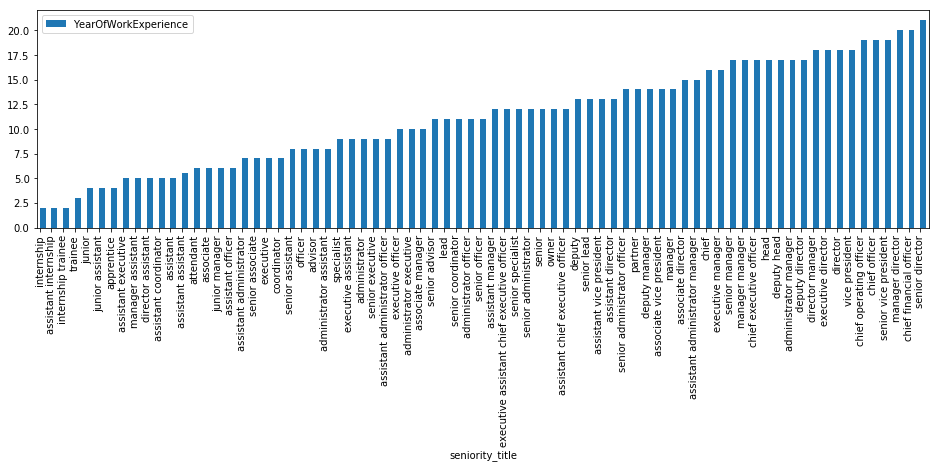

In [32]:
stats = df.groupby(
    'seniority_title').filter(lambda x: len(x) > 100).groupby(
    'seniority_title').median().sort_values(
    'YearOfWorkExperience'
)

stats.plot(kind='bar', figsize=(16,4), rot=90, position=0)

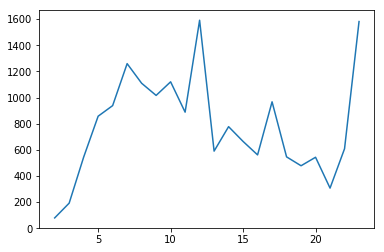

In [30]:
df = df[df.seniority_title.notnull()]
df[df.seniority_title.str.match('^senior$')].YearOfWorkExperience.value_counts().sort_index().plot()

In [ ]:
# seniority_titles['titles'].append('deputy')
# save_json(seniority_titles, TITLE_PATH)

In [ ]:
# seniority_exp = stats.values
# min_max_scaler = preprocessing.MinMaxScaler()
# seniority_exp_scaled = min_max_scaler.fit_transform(seniority_exp)
# seniority_exp = pd.DataFrame(seniority_exp_scaled)
# seniority_exp.index = stats.index
# seniority_exp = seniority_exp.reset_index()
# seniority_exp.columns = ['seniority_title', 'score']
# seniority_exp.score = seniority_exp.score.apply(lambda x : x * 10)
# seniority_exp.to_json('seniority_title_scores.json', orient='records')